#### CSE 452: Neural Networks and Fuzzy Systems Lab
Summer-2020, Dept. of CSE, NEUB <br>

#### Student Info
<b>Name:</b> MD. ABU SHAHAN<br>
<b>Reg. No:</b> 170103020017

### Assignment 5: Fully Connected Layer

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report, confusion_matrix ,  accuracy_score
from sklearn import datasets 
from sklearn.metrics import log_loss

<b>Toy data</b>

In [72]:
X=np.array([[1, 2], [4, 5], [12, 7], [16, 10], [20, 5], [5, 8]  ])
y=np.array([[0,1], [0,1], [1,0], [1,0],  [0,1], [1,0] ])
print(X.shape, y.shape)

(6, 2) (6, 2)


In [73]:
print(y)

[[0 1]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [1 0]]


<b>Softmax</b>
$$Let, a=[a_0, a_1, a_2, ..]$$
$$S_i=\frac{e^{a_i}}{\sum_{k=0}^{N} {e^{a_k}}}$$

<b>Task 1: Implement Softmax</b> <br>
1. Implement both ways: Using loop and Without using loop. <br>
2. What challanges did you face?
3. Check output manually.

In [74]:
z=np.array( [ [1.2, 1.6], [2.4, 3.4],  [3.8, 5.8],  [5.1, 7.8],  [4. , 6.6],   [3.4, 4.8]])
print(z)

[[1.2 1.6]
 [2.4 3.4]
 [3.8 5.8]
 [5.1 7.8]
 [4.  6.6]
 [3.4 4.8]]


In [75]:
#your code goes here.
#a=softmax(z)
import math
a={}
ind=0
for i in z:
    sm1=math.exp(i[0])
    sm2=math.exp(i[1])
    sm=sm1+sm2
    b=[]
    for j in i:
        b.append(math.exp(j)/sm)
    a[ind]=b
    ind+=1
a

{0: [0.401312339887548, 0.598687660112452],
 1: [0.2689414213699951, 0.7310585786300049],
 2: [0.11920292202211756, 0.8807970779778825],
 3: [0.06297335605699649, 0.9370266439430035],
 4: [0.06913842034334684, 0.9308615796566533],
 5: [0.19781611144141828, 0.8021838885585818]}

In [76]:
from scipy.special import softmax
aa=softmax(z,axis=1)

In [77]:
for i in aa:
    for j in i:
        print(j,end=' ')
    print()

0.4013123398875481 0.5986876601124522 
0.26894142136999505 0.7310585786300048 
0.11920292202211759 0.8807970779778826 
0.06297335605699647 0.9370266439430033 
0.06913842034334684 0.9308615796566532 
0.19781611144141834 0.802183888558582 


<b>Task 2: calculate feedforward output</b><br><br>
$A=softmax(X.w+b)$

Output should look like the following. <br>

[[0.401 0.599] <br>
 [0.269 0.731] <br>
 [0.119 0.881] <br>
 [0.063 0.937] <br>
 [0.069 0.931] <br>
 [0.198 0.802]]

In [78]:
b=np.array([0.5, 0.6])
w=np.array([ [0.1,0.2], [0.3,0.4] ])

In [79]:
#your code goes here.
x_w=np.dot(X,w)
z=x_w+b
A=softmax(z,axis=1)
print(A)

[[0.40131234 0.59868766]
 [0.26894142 0.73105858]
 [0.11920292 0.88079708]
 [0.06297336 0.93702664]
 [0.06913842 0.93086158]
 [0.19781611 0.80218389]]


<b>Task 3: calculate log loss</b><br><br> 
Note: <b>without using any loop.</b> <br>
$$L_i = - y_i* \sum \log (A_i)$$
\begin{equation*}
L =\frac{1}{N} \sum_i L_i 
\end{equation*}

Output should look like the following. <br>
Loss: [0.513 0.313 2.127 2.765 0.072 1.62 ] <br>
average loss: 1.2351

In [80]:
#your code goes here.
L=-np.sum( y*np.log(A) , axis=1, keepdims=True)
print(L)
avg=np.average(L)
print(avg)

[[0.51301525]
 [0.31326169]
 [2.12692801]
 [2.76504356]
 [0.07164469]
 [1.62041741]]
1.2350517691039766


<b>Task 4: calculate gradient</b><br>
Note: <b>calculate dz, dw, db without using loop</b> </br>
$$dz=A-y$$ 
$$dw=\frac{1}{N} ( X^T.dz )$$   
$$db=\frac{1}{N} \sum dz $$ 

Dimension check: y-yh= (2xN).(NX2)=(2x2) 

dw should look like below, <br>
[[-4.452,  4.452], <br>
[-3.243,  3.243]])

db should look like below<br>
[[-0.313,  0.313]]

In [82]:
#your code goes here.
dz=A-y
#print(dz)
x=X.T
dot=np.dot(x,dz)
dw=dot/len(dz)
print('dw: ',dw)


db=sum(dz)/len(dz)
print('db: ',db)

dw:  [[-4.45217737  4.45217737]
 [-3.2433822   3.2433822 ]]
db:  [-0.3134359  0.3134359]


<b>Task 5: Train the network using gradient descent optimization</b>

In [ ]:
lr=0.01
epoch=1000

In [84]:
#init w and b randomly.
D=X.shape[1]
C=y.shape[1]
w = 0.01 * np.random.randn(D,C)
b = np.zeros((1,C))

 1. Init w and b randomly
 2. repeat the following
     3. calculate feedforward output
     4. calculate gradient
     5. update w and b (w=w-lr\*dw,  b=b-lr*db)
     6. calculate loss and keep track.

7. After training plot the loss
8. test prediction on the X data

In [85]:
#your code goes here.
D=X.shape[1]
C=y.shape[1]
w = 0.01 * np.random.randn(D,C)
b = np.zeros((1,C))
loss=[]
for i in range(0,epoch):
    x_w=np.dot(X,w)
    z=x_w+b
    A=softmax(z,axis=1)
    
    dz=A-y
    x=X.T
    dot=np.dot(x,dz)
    dw=dot/len(dz)
    db=sum(dz)/len(dz)
    
    w=w-lr*dw
    b=b-lr*db
    
    loss.append(log_loss(y,A))

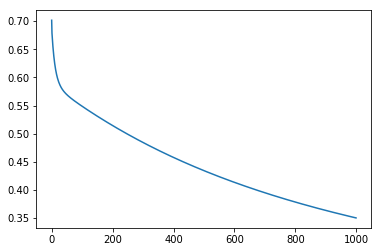

In [86]:
plt.plot(loss)
plt.show()

In [97]:
x_w=np.dot(X,w)
z=x_w+b
A=softmax(z,axis=1)
AA=np.zeros((len(A), len(A[0])))
for i in range(len(A)):
    mx=np.max(A[i])
    if(mx==A[i][0]):
        AA[i][0]=1
    else:
        AA[i][1]=1
cnt=0
for i in range(0,len(AA)):
    if(AA[i][0]==y[i][0] and AA[i][1]==y[i][1]):
        cnt+=1

percentage=(cnt*100)/len(AA)
print(percentage,'%')

83.33333333333333 %


<b>Digits Data</b>

In [114]:
datas=datasets.load_digits()
data=datas['data']
label=datas['target'] 

In [115]:
X,X_test, y, y_test=train_test_split(data, label, test_size = 0.2)
print('Training shape:', X.shape, y.shape)
print('Testing shape:',X_test.shape, y_test.shape)

Training shape: (1437, 64) (1437,)
Testing shape: (360, 64) (360,)


In [116]:
N,D=X.shape            #num_data, data_dimension
C=np.max(y)+1          #number of classes

In [117]:
C

10

In [118]:
y

array([8, 4, 2, ..., 7, 7, 9])

<b>Task 6: Train on the digits data [Note: y is not one-hot vector now]</b>
1. Train a two layer[Input, Output] network
2. Plot loss, tune learning rate, number of epochs
3. predict on test data and show accuracy.  [accuracy should be above 90%]
4. Play with the learning rate and number of epochs [try few values]

In [120]:
y_onehot=np.zeros((N, 10))
y_onehot[ range(N), y]=1

In [122]:
#your code goes here.
w = 0.01 * np.random.randn(D,C)
b = np.zeros((1,C))
loss=[]
for i in range(0,epoch):
    x_w=np.dot(X,w)
    z=x_w+b
    A=softmax(z,axis=1)
    
    dz=A-y_onehot
    x=X.T
    dot=np.dot(x,dz)
    dw=dot/len(dz)
    db=sum(dz)/len(dz)
    
    w=w-lr*dw
    b=b-lr*db
    
    loss.append(log_loss(y_onehot,A))

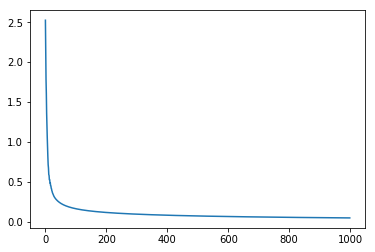

In [123]:
plt.plot(loss)
plt.show()

In [130]:
y_onehot=np.zeros((len(y_test), 10))
y_onehot[ range(len(y_test)), y_test]=1

In [131]:
x_w=np.dot(X_test,w)
z=x_w+b
A=softmax(z,axis=1)
AA=np.zeros((len(A), len(A[0])))
for i in range(len(A)):
    mx=np.max(A[i])
    for j in range(0,C):
        if(mx==A[i][j]):
            AA[i][j]=1
cnt=0
c=0
for i in range(0,len(AA)):
    c=0
    for j in range(0,C): 
        if(AA[i][j]==y_onehot[i][j]):
            c+=1
    if c==C:
        cnt+=1

percentage=(cnt*100)/len(AA)
print(percentage,'%')

96.11111111111111 %


### Submission

1. Complete The Honor Code
2. Submit this notebook file to google classroom.

<b>Comment on google classroom if you have any questions</b>

### Honor Code
Plese type the following in the next cell. Replace the underlined text with your own. 

I am <u>Md. Abu Shahan</u> bearing registration no. <u>170103020017</u> hereby declaring that I myself did my assignments, I didn't directly copy any code from others. I have a complete understanding of my code and can explain. I respect this honor code and I believe it will be useful to maintain academic integrity.<br>

Name: <u>Md. Abu Shahan</u><br>
Date: <u>01/09/20</u>

_your__writing_